# Convolutional Neural Networks

## Tasks

### Task 1

Code a function to calculate the number of parameters in a convolutional layer.  
Your function should take as input the number of input channels, the number of output channels, the kernel size, and whether to include a learnable bias.  
Have the following function signature: `def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool)`

In [1]:
def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):
    result = (in_channels * kernel_size ** 2 + 1) * out_channels
    return result if bias else result - out_channels

In [2]:
count_parameters_conv(3, 1, 3, True)

28

### Task 2

Train a fully connected neural network for classification on the `MNIST` dataset.   
Achieve 98% accuracy on the test set.  

Code a function that creates your model and returns an object, name the function `create_mlp_model`, without arguments.  
You will need to save the weights of your model and submit them to the tester, use `torch.save` and `state_dict` methods for this.

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim import Optimizer, Adam
from torchvision import datasets, transforms
from tqdm import tqdm

In [4]:
def create_mlp_model():
    model = nn.Sequential(
        nn.Flatten(),  
        nn.Linear(784, 512), 
        nn.ReLU(),    
        
        nn.Linear(512, 256),  
        nn.ReLU(),
        
        nn.Linear(256, 128),  
        nn.ReLU(),
        
        nn.Linear(128, 10)    
    )
    return model

In [5]:
def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x, y in tqdm(train_loader, desc='Train'):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    
    return train_loss

In [6]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

In [7]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

In [8]:
mlp_model = create_mlp_model()

optimizer = torch.optim.Adam(mlp_model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

In [9]:
from torchvision.datasets import MNIST
import torchvision.transforms as T
from time import perf_counter
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [10]:
mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)

In [11]:
mnist_valid = MNIST(
    "../datasets/mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [12]:
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

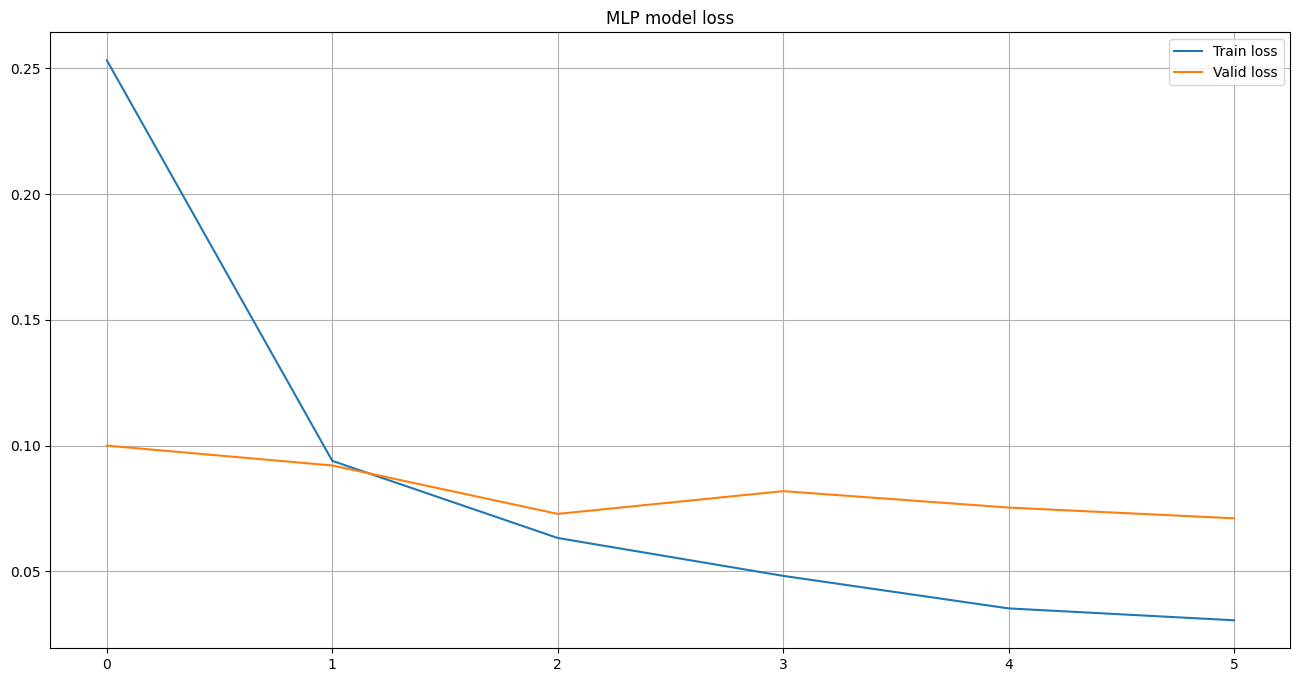

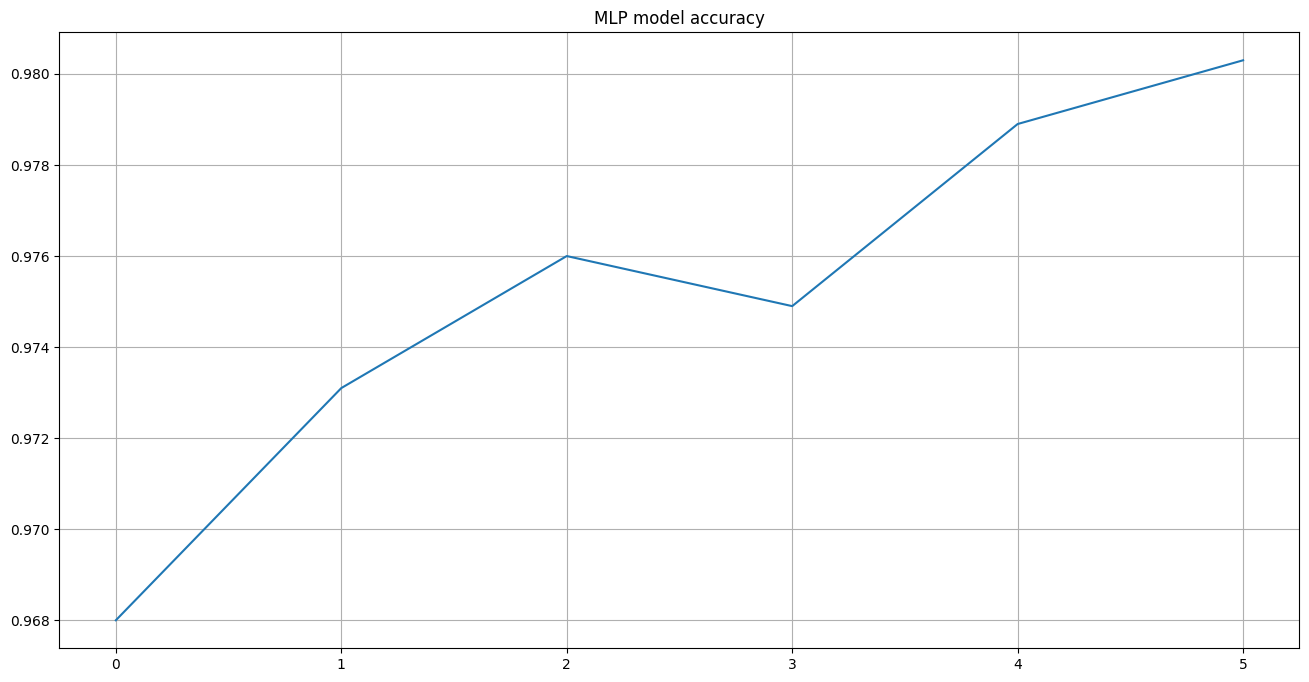

Total training and evaluation time 94.84783


In [13]:
num_epochs = 10

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(mlp_model)

    valid_loss, valid_accuracy = evaluate(mlp_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)
    
    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')

    if valid_accuracy >= 0.9801:
        break
    
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [14]:
print(f'Validation accuracy: {valid_accuracy_history[-1:][0]:.2%} reached on epoch: {epoch}')

Validation accuracy: 98.03% reached on epoch: 5


In [15]:
torch.save(mlp_model.state_dict(), 'mlp_mnist_weights.pt')

### Task 3

Train a convolutional neural network for classification on the `MNIST` dataset.   
Achieve 99.3% accuracy on the test set.

You can use the previously written train and evaluate functions.  

Code a function that creates your model and returns an object, name the function `create_conv_model`, without arguments.   

You will need to save the weights of your model and submit them to the tester, use torch.save and state_dict methods for this.

In [16]:
def create_conv_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  
        
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  
        
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), 
        
        nn.Flatten(),  
        nn.Linear(3 * 3 * 128, 128),
        nn.ReLU(),
        nn.Linear(128, 10),  
    )
    return model

In [17]:
conv_model = create_conv_model()

optimizer = torch.optim.Adam(conv_model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

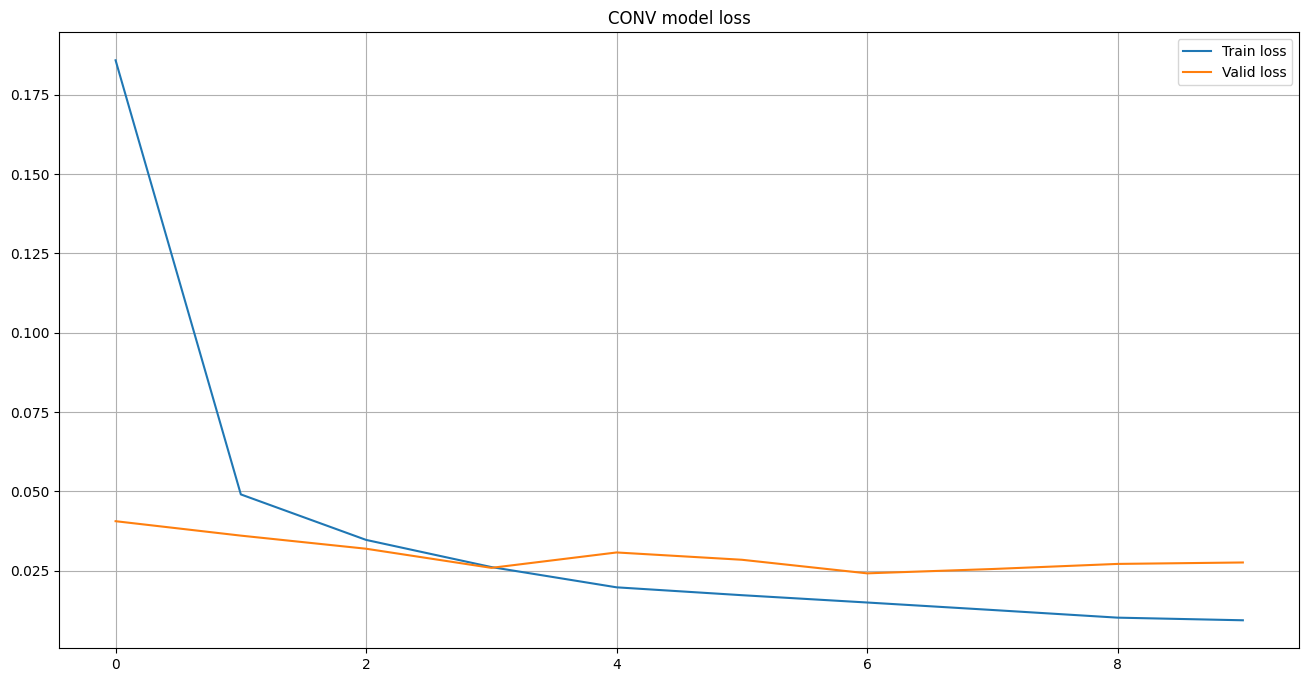

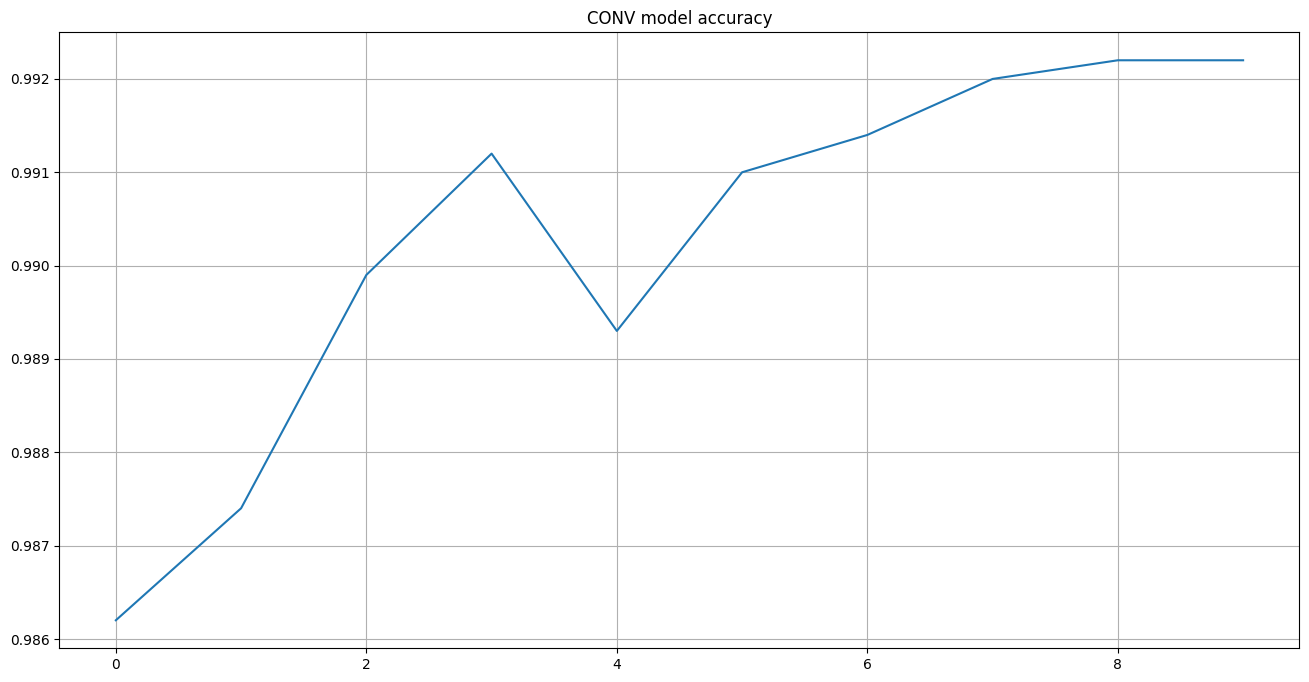

Total training and evaluation time 537.37946


In [18]:
num_epochs = 10

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(conv_model)

    valid_loss, valid_accuracy = evaluate(conv_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'CONV model')

    if valid_accuracy >= 0.9931:
        break

print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [19]:
print(f'Validation accuracy: {valid_accuracy_history[-1:][0]:.2%} reached on epoch: {epoch}')

Validation accuracy: 99.22% reached on epoch: 9


In [20]:
torch.save(conv_model.state_dict(), 'conv_mnist_weights_cpu.pt')

#### Task 3 - GPU

In [21]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim import Optimizer, Adam
from torchvision import datasets, transforms
from tqdm import tqdm

# Check if GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def create_conv_model():
    model = nn.Sequential(
        # First convolutional block
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        
        # Second convolutional block
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        
        # Third convolutional block
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        
        # Flatten and classifier
        nn.Flatten(),
        nn.Linear(1152, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
    return model

# Modified train function to use GPU
def train(
    model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn
) -> tuple[float, float]:
    model.train()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(data_loader, desc='Train'):
        # Move data to GPU
        x, y = x.to(device), y.to(device)
        
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()

        optimizer.step()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    return total_loss / len(data_loader), correct / total

# Modified evaluate function to use GPU
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    with torch.no_grad():
        for x, y in tqdm(data_loader, desc='Evaluate'):
            # Move data to GPU
            x, y = x.to(device), y.to(device)
            
            output = model(x)

            loss = loss_fn(output, y)

            total_loss += loss.item()

            _, y_pred = torch.max(output, 1)
            total += y.size(0)
            correct += (y_pred == y).sum().item()

    return total_loss / len(data_loader), correct / total

# Main training code
def main():
    # Load and preprocess the MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load training data - increase batch size for GPU
    #train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    #train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4, pin_memory=True)

    # Load test data
    #test_dataset = datasets.MNIST('./data', train=False, transform=transform)
    #test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=4, pin_memory=True)

    # Create model and move to GPU
    model = create_conv_model().to(device)
    
    # Enable mixed precision for faster training
    scaler = torch.cuda.amp.GradScaler()
    
    # Loss function and optimizer
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=3, verbose=True
    )

    # Training loop
    num_epochs = 300
    best_accuracy = 0

    for epoch in range(num_epochs):
        # Train with mixed precision
        model.train()
        total_loss = 0
        total = 0
        correct = 0

        for x, y in tqdm(train_loader, desc=f'Train Epoch {epoch+1}'):
            x, y = x.to(device), y.to(device)
            
            optimizer.zero_grad()
            
            # Use mixed precision
            with torch.cuda.amp.autocast():
                output = model(x)
                loss = loss_fn(output, y)
            
            # Scale gradients and optimize
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            total_loss += loss.item()
            
            _, y_pred = torch.max(output, 1)
            total += y.size(0)
            correct += (y_pred == y).sum().item()
        
        train_loss = total_loss / len(train_loader)
        train_acc = correct / total
        
        # Evaluate
        test_loss, test_acc = evaluate(model, test_loader, loss_fn)
        
        # Update learning rate
        scheduler.step(test_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        
        # Save the best model
        if test_acc > best_accuracy:
            best_accuracy = test_acc
            torch.save(model.state_dict(), 'cnn_mnist.pt')
            print(f"New best accuracy: {best_accuracy:.4f} - Model saved")
            
        # Check if we've reached our target accuracy
        if test_acc >= 0.9931:
            print(f"\n\nTarget accuracy of 99.3% achieved at epoch {epoch+1}!")
            break

    print(f"Best test accuracy: {best_accuracy:.4f}")

if __name__ == "__main__":
    main()

Using device: cuda:0


<ipython-input-21-0d9829034068>:121: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Train Epoch 1:   0%|          | 0/938 [00:00<?, ?it/s]<ipython-input-21-0d9829034068>:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Evaluate: 100%|██████████| 157/157 [00:01<00:00, 99.73it/s] 


Epoch 1/300, Train Loss: 0.1749, Train Acc: 0.9419, Test Loss: 0.0741, Test Acc: 0.9781
New best accuracy: 0.9781 - Model saved


Evaluate: 100%|██████████| 157/157 [00:01<00:00, 103.34it/s]


Epoch 2/300, Train Loss: 0.0452, Train Acc: 0.9863, Test Loss: 0.0433, Test Acc: 0.9862
New best accuracy: 0.9862 - Model saved


Evaluate: 100%|██████████| 157/157 [00:01<00:00, 104.80it/s]


Epoch 3/300, Train Loss: 0.0325, Train Acc: 0.9899, Test Loss: 0.0249, Test Acc: 0.9912
New best accuracy: 0.9912 - Model saved


Evaluate: 100%|██████████| 157/157 [00:01<00:00, 102.83it/s]


Epoch 4/300, Train Loss: 0.0255, Train Acc: 0.9919, Test Loss: 0.0342, Test Acc: 0.9907


Evaluate: 100%|██████████| 157/157 [00:01<00:00, 106.01it/s]

Epoch 5/300, Train Loss: 0.0212, Train Acc: 0.9936, Test Loss: 0.0230, Test Acc: 0.9937
New best accuracy: 0.9937 - Model saved


Target accuracy of 99.3% achieved at epoch 5!
Best test accuracy: 0.9937
